In [22]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline
from matplotlib import style
style.use('dark_background')
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [23]:
df = pd.read_csv("salaries.csv")
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [24]:
inputs = df.drop('salary_more_then_100k',axis='columns')
target = df.salary_more_then_100k

In [25]:
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [26]:
inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_job.fit_transform(inputs['job'])
inputs['degree_n'] = le_degree.fit_transform(inputs['degree'])
inputs

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [27]:
inputs_n = inputs.drop(['company','job','degree'],axis='columns')
inputs_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [28]:
model = tree.DecisionTreeClassifier()
model.fit(inputs_n,target)

DecisionTreeClassifier()

In [29]:
model.score(inputs_n,target)

1.0

In [31]:
model.predict([[2,2,1]])

array([0], dtype=int64)

[Text(121.74545454545455, 199.32, 'X[0] <= 0.5\ngini = 0.469\nsamples = 16\nvalue = [6, 10]'),
 Text(60.872727272727275, 163.07999999999998, 'X[2] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(30.436363636363637, 126.83999999999999, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(91.30909090909091, 126.83999999999999, 'X[1] <= 1.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(60.872727272727275, 90.6, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(121.74545454545455, 90.6, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(182.61818181818182, 163.07999999999998, 'X[0] <= 1.5\ngini = 0.375\nsamples = 12\nvalue = [3, 9]'),
 Text(152.1818181818182, 126.83999999999999, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(213.05454545454546, 126.83999999999999, 'X[1] <= 0.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(182.61818181818182, 90.6, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(243.4909090909091, 90.6, 'X[2] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3

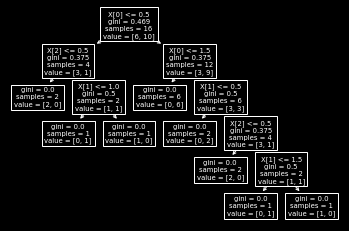

In [32]:
tree.plot_tree(model.fit(inputs_n,target))